# Email spam Detection with Machine Learning

We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email
that is sent to a massive number of users at one time, frequently containing cryptic
messages, scams, or most dangerously, phishing content.


In this Project, use Python to build an email spam detector. Then, use machine learning to
train the spam detector to recognize and classify emails into spam and non-spam. Let’s get
started!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("spam.csv", encoding="latin1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [5]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [6]:
df.tail()

,target,text
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [7]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [8]:
df.duplicated().sum()

403

In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(5169, 2)

### EDA

In [12]:
df['target'].value_counts()

ham     4516
spam     653
Name: target, dtype: int64

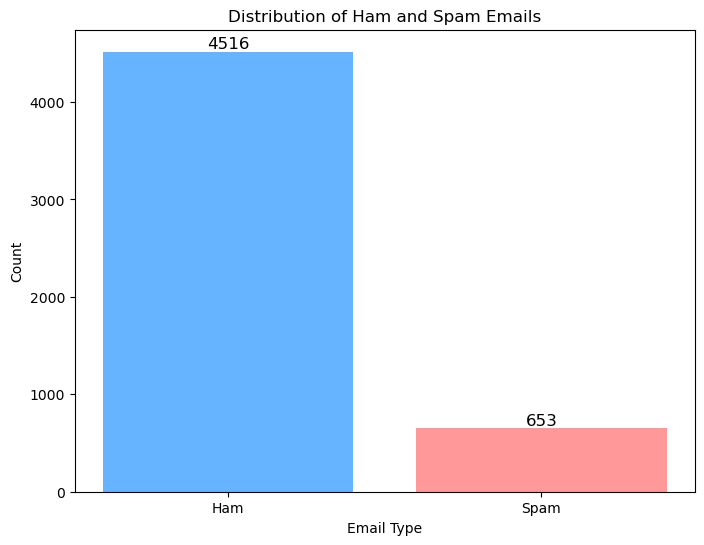

In [13]:
labels = ['Ham', 'Spam']
sizes = df['target'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, sizes, color=['#66b3ff', '#ff9999'])
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Distribution of Ham and Spam Emails')
for i in range(len(labels)):
    plt.text(i, sizes[i], sizes[i], ha='center', va='bottom', fontsize=12)
plt.show()

In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Yamin
[nltk_data]     Hossain\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
df['num_characters'] = df['text'].apply(len)

In [16]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [17]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [18]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [19]:
df[df['target'] == 'ham'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [20]:
df[df['target'] == 'spam'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


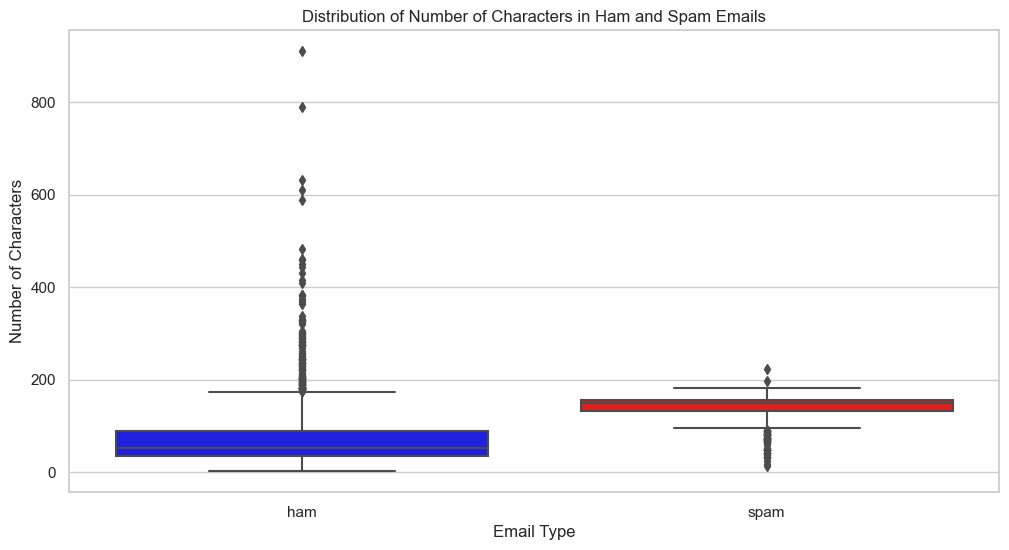

In [21]:
import seaborn as sns

# Set style
sns.set(style='whitegrid')

# Create a figure
plt.figure(figsize=(12, 6))

# Create a box plot for 'ham' and 'spam' emails
sns.boxplot(x='target', y='num_characters', data=df, palette={'ham': 'blue', 'spam': 'red'})

# Add labels and title
plt.xlabel('Email Type')
plt.ylabel('Number of Characters')
plt.title('Distribution of Number of Characters in Ham and Spam Emails')

# Show the plot
plt.show()


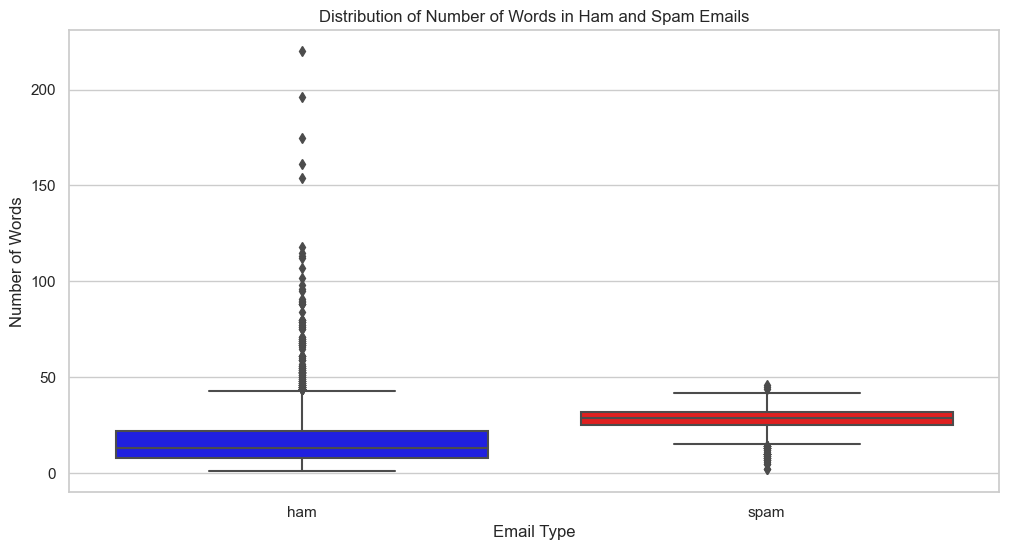

In [22]:
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))

# Create a box plot for 'ham' and 'spam' emails
sns.boxplot(x='target', y='num_words', data=df, palette={'ham': 'blue', 'spam': 'red'})
plt.xlabel('Email Type')
plt.ylabel('Number of Words')
plt.title('Distribution of Number of Words in Ham and Spam Emails')
plt.show()


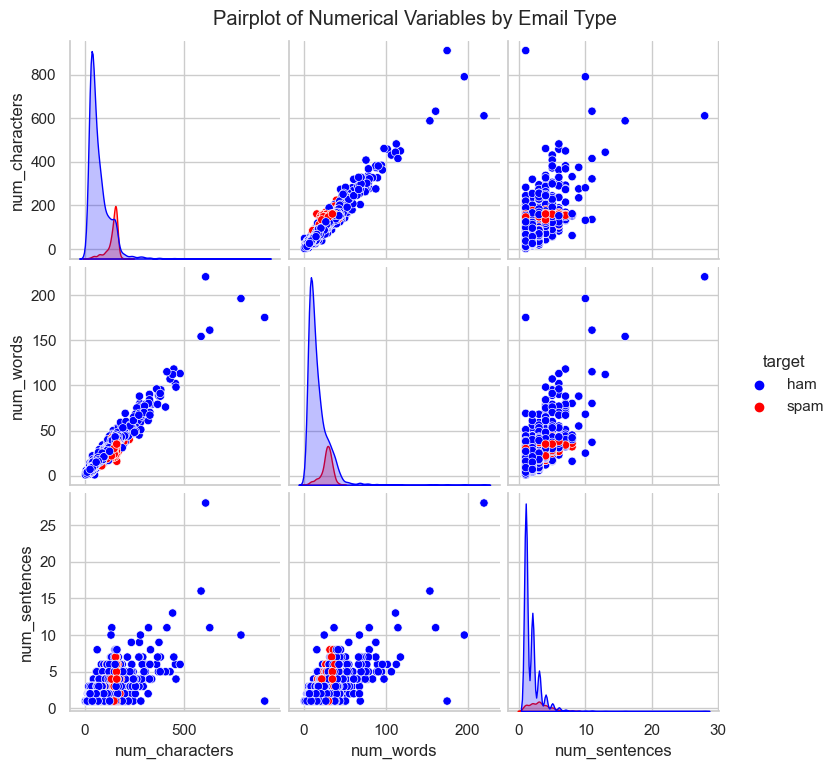

In [23]:
sns.set(style='whitegrid')
sns.pairplot(df, hue='target', palette={'ham': 'blue', 'spam': 'red'})
plt.suptitle('Pairplot of Numerical Variables by Email Type', y=1.02)
plt.show()

C:\Users\Yamin Hossain\AppData\Local\Temp\ipykernel_21688\289690973.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


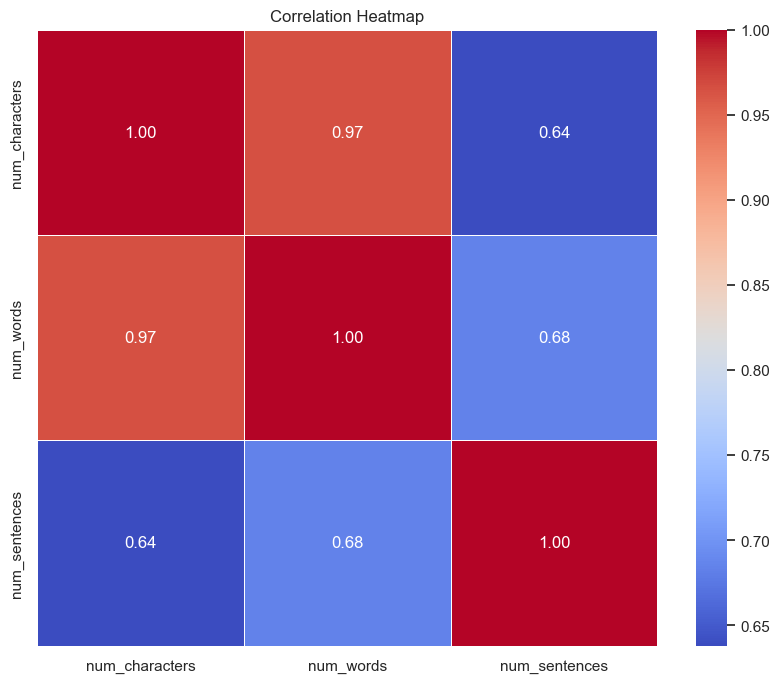

In [24]:
correlation_matrix = df.corr()
sns.set(style='white')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Data Preprocessing

In [25]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Download NLTK resources if needed
nltk.download('punkt')
nltk.download('stopwords')

# Initialize the stemmer
ps = PorterStemmer()

# Define the text preprocessing function
def transform_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords, punctuation, and apply stemming
    cleaned_tokens = [ps.stem(token) for token in tokens if token.isalnum() and token not in stopwords.words('english')]

    # Join cleaned tokens back into a string
    cleaned_text = " ".join(cleaned_tokens)

    return cleaned_text

df['transformed_text'] = df['text'].apply(transform_text)
df.head()

[nltk_data] Downloading package punkt to C:\Users\Yamin
[nltk_data]     Hossain\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Yamin
[nltk_data]     Hossain\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,target,text,num_characters,num_words,num_sentences,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


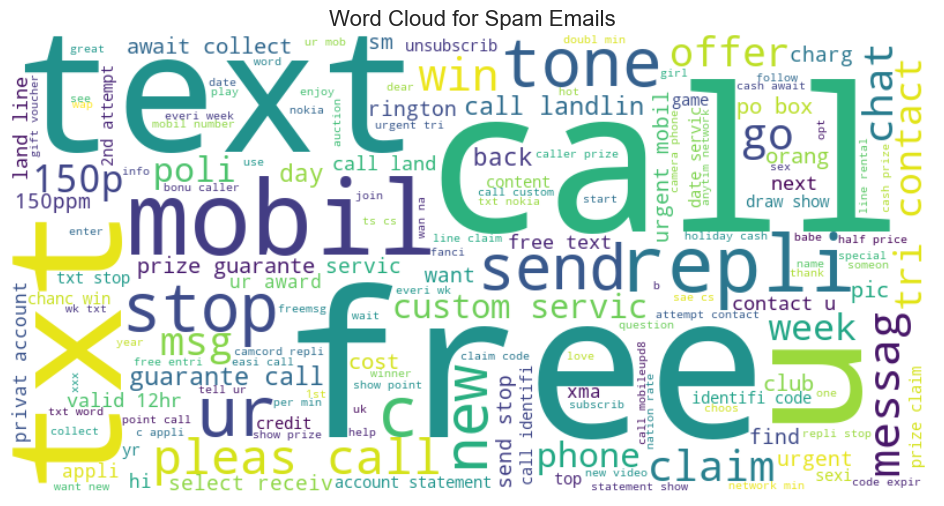

In [26]:
from wordcloud import WordCloud

wc = WordCloud(
    width=800,
    height=400,
    min_font_size=10,
    background_color='white',
    colormap='viridis', 
    contour_width=2,
    contour_color='black',
)

# Generate the word cloud from the transformed text of spam emails
spam_text = df[df['target'] == 'spam']['transformed_text'].str.cat(sep=" ")
spam_wc = wc.generate(spam_text)
plt.figure(figsize=(12, 6))
plt.imshow(spam_wc, interpolation='bilinear')
plt.title('Word Cloud for Spam Emails', fontsize=16)
plt.axis('off') 
plt.show()

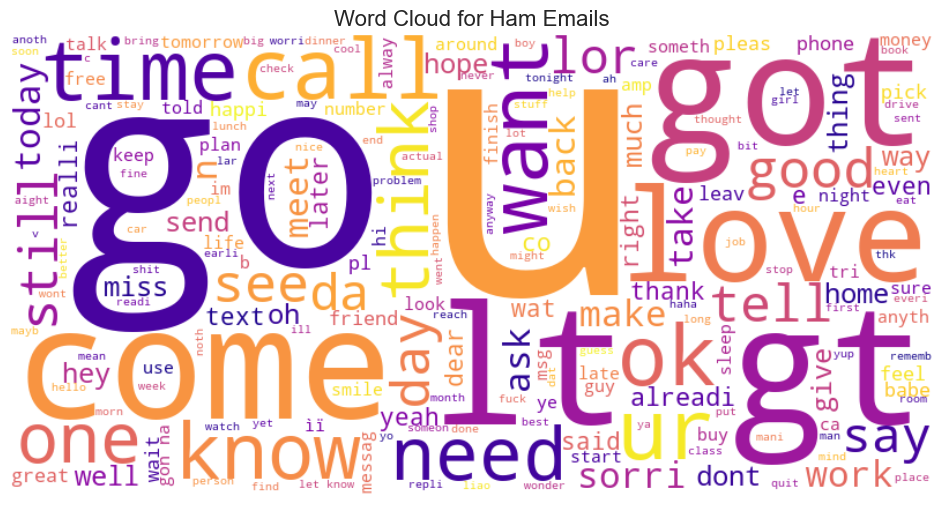

In [27]:
# Create a WordCloud object with custom parameters
wc = WordCloud(
    width=800,
    height=400,
    min_font_size=10,
    background_color='white',
    colormap='plasma',
    contour_width=2,
    contour_color='black',
)
# Generate the word cloud from the transformed text of 'ham' emails
ham_text = df[df['target'] == 'ham']['transformed_text'].str.cat(sep=" ")
ham_wc = wc.generate(ham_text)

plt.figure(figsize=(12, 6))
plt.imshow(ham_wc, interpolation='bilinear')
plt.title('Word Cloud for Ham Emails', fontsize=16)
plt.axis('off')
plt.show()


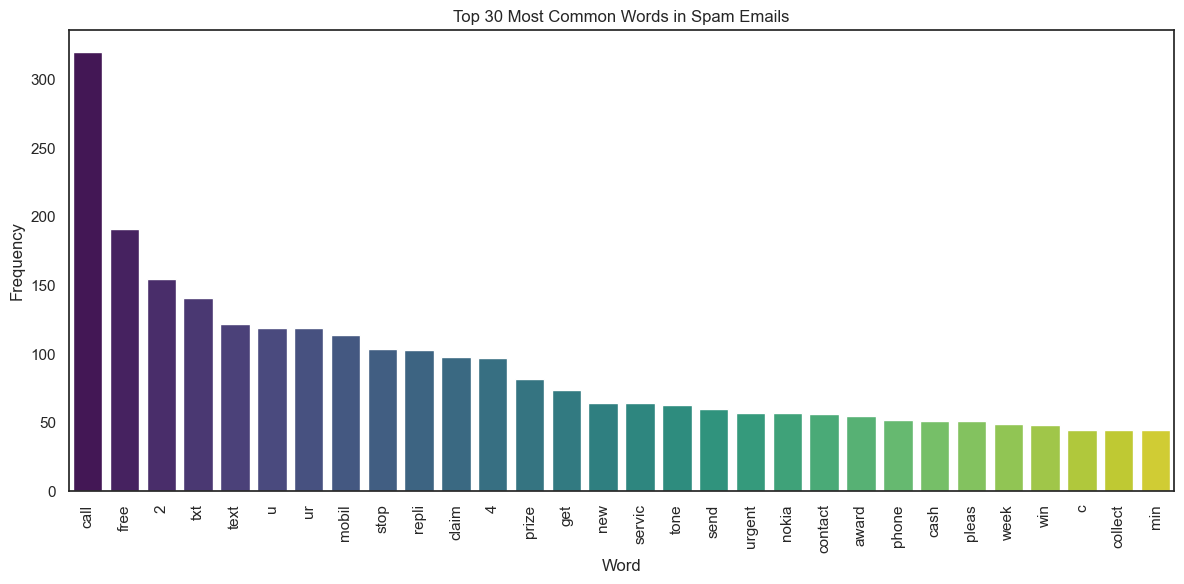

In [28]:
from collections import Counter

# Extract 'transformed_text' from 'spam' emails and split into words
spam_text = df[df['target'] == 'spam']['transformed_text'].str.split().tolist()

# Flatten the list of words
spam_corpus = [word for sublist in spam_text for word in sublist]

# Count the frequency of each word
word_counts = Counter(spam_corpus)

# Create a DataFrame from the word counts
word_counts_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Frequency'])

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Frequency', data=word_counts_df, palette='viridis')
plt.title('Top 30 Most Common Words in Spam Emails')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()

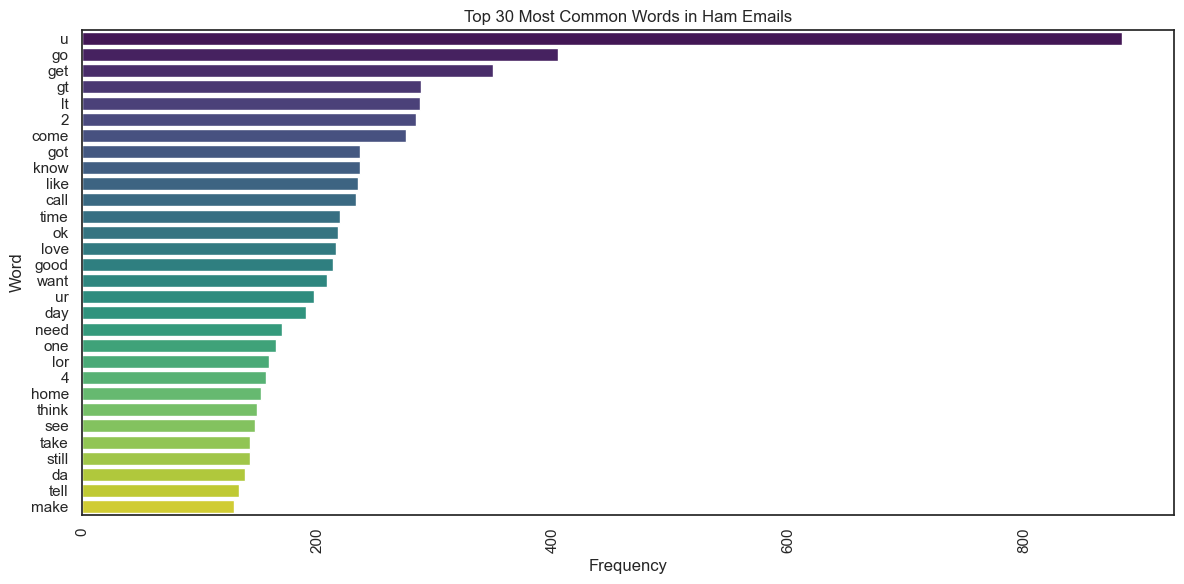

In [29]:
# Extract 'transformed_text' from 'ham' emails and split into words
ham_text = df[df['target'] == 'ham']['transformed_text'].str.split().tolist()

# Flatten the list of words
ham_corpus = [word for sublist in ham_text for word in sublist]

# Count the frequency of each word
word_counts = Counter(ham_corpus)

# Create a DataFrame from the word counts
word_counts_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Frequency'])

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word', data=word_counts_df, palette='viridis')
plt.title('Top 30 Most Common Words in Ham Emails')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [30]:
len(spam_corpus)

9939

In [31]:
len(ham_corpus)

35394

In [32]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### encoding and splitting

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [34]:
X.shape

(5169, 3000)

In [35]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['target'] = encoder.fit_transform(df['target'])

In [36]:
y = df['target'].values

In [37]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)

### Different classification Models

In [38]:
from sklearn.metrics import accuracy_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
gnb = GaussianNB()  
bnb = BernoulliNB()  
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

# Create a dictionary of classifiers
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'GNB': gnb, 
    'BNB': bnb,  
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

def train_and_evaluate_classifiers(classifiers, X_train, y_train, X_test, y_test):
    results = []

    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)

        results.append({'Classifier': name, 'Accuracy': accuracy, 'Precision': precision})

    results_df = pd.DataFrame(results)

    return results_df

results_df = train_and_evaluate_classifiers(clfs, X_train, y_train, X_test, y_test)
results_df

,Classifier,Accuracy,Precision
0,SVC,0.974855,0.975000
1,KN,0.909091,1.000000
2,NB,0.971631,1.000000
3,GNB,0.872340,0.488673
4,BNB,0.981947,0.988024
5,DT,0.936815,0.825175
6,LR,0.952289,0.933333
7,RF,0.972921,0.980645
8,AdaBoost,0.958736,0.915033
9,BgC,0.960026,0.864407


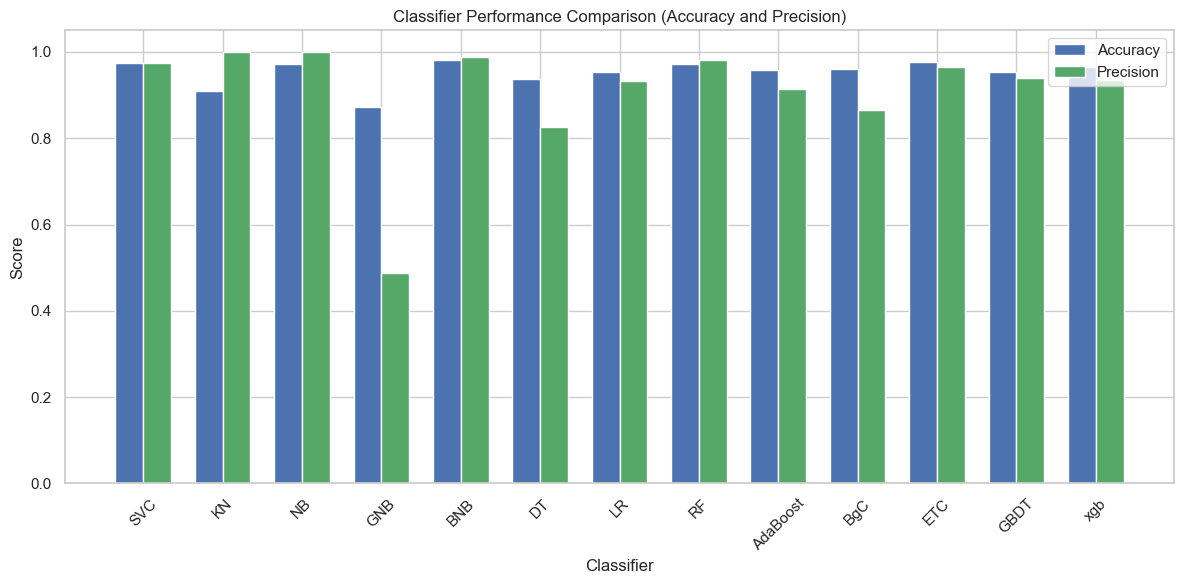

In [39]:
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

# Add bar positions
bar_width = 0.35
index = range(len(results_df))

# Plot Accuracy
plt.bar(index, results_df['Accuracy'], bar_width, label='Accuracy', color='b')

# Plot Precision
plt.bar([i + bar_width for i in index], results_df['Precision'], bar_width, label='Precision', color='g')

plt.xlabel('Classifier')
plt.ylabel('Score')
plt.title('Classifier Performance Comparison (Accuracy and Precision)')
plt.xticks([i + bar_width/2 for i in index], results_df['Classifier'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [40]:
from sklearn.ensemble import VotingClassifier

svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

# Create the VotingClassifier with soft voting
voting = VotingClassifier(
    estimators=[
        ('svm', svc),
        ('nb', mnb),
        ('et', etc)
    ],
    voting='soft'
)

voting.fit(X_train, y_train)

y_pred = voting.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

Accuracy: 0.9825918762088974
Precision: 0.9939759036144579


In [41]:
from sklearn.ensemble import StackingClassifier

svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

final_estimator = RandomForestClassifier()

stacking_clf = StackingClassifier(
    estimators=[
        ('svm', svc),
        ('nb', mnb),
        ('et', etc)
    ],
    final_estimator=final_estimator
)

stacking_clf.fit(X_train, y_train)

y_pred = stacking_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))


Accuracy: 0.9813023855577047
Precision: 0.95
